In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd

In [3]:
df_employee=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/empl.csv')

In [4]:
df_employee.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


### lets chheck the null values in the dataset

In [5]:
df_employee.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

### Before imputing lets check the datatype

In [6]:
df_employee.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

### lets do some graphical analysis

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Country', ylabel='Salary'>

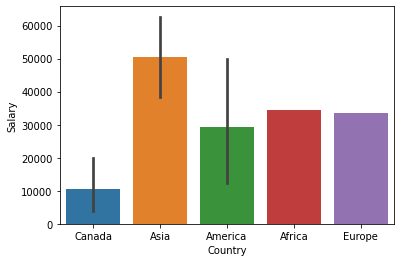

In [8]:
sns.barplot(y='Salary',x='Country',data=df_employee)

<AxesSubplot:xlabel='City', ylabel='Salary'>

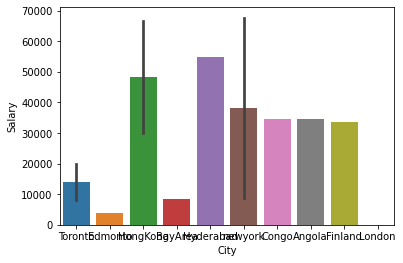

In [9]:
sns.barplot(y='Salary',x='City',data=df_employee)

### Now lets impute the null values in columns Age,City and Salary as found above

In [10]:
col_to_impute=["Age","City"]
for col in col_to_impute:
    if df_employee[col].dtype!="object":
        df_employee[col].fillna(df_employee[col].mean(),inplace=True)
    else:
        df_employee[col].fillna(df_employee[col].mode()[0],inplace=True)

In [11]:
df_slry_grpby_city=df_employee.groupby(["City"]).Salary.mean()
df_slry_grpby_city

City
Angola       34534.000000
BayArea       8300.000000
Congo        34432.000000
Edmonto       3900.000000
Finland      33451.000000
HongKong     39333.666667
Hyderabad    54666.000000
London                NaN
Toronto      14000.000000
newyork      38277.000000
Name: Salary, dtype: float64

In [12]:
df_slry_grpby_city=df_employee.groupby(["City"]).agg({"Salary":["mean",'max'], 'Age':'mean'})

In [13]:
df_slry_grpby_city

Salary                 Age
                   mean      max       mean
City                                       
Angola     34534.000000  34534.0  32.000000
BayArea     8300.000000   8300.0  43.000000
Congo      34432.000000  34432.0  34.000000
Edmonto     3900.000000   3900.0  31.000000
Finland    33451.000000  33451.0  26.000000
HongKong   39333.666667  66672.0  29.917293
Hyderabad  54666.000000  54666.0  38.000000
London              NaN      NaN  27.000000
Toronto    14000.000000  20000.0  31.000000
newyork    38277.000000  67666.0  35.460526

In [14]:
for index in df_slry_grpby_city.index:
    df_employee.loc[df_employee['City']==index,['Salary']]=df_employee.loc[df_employee['City']==index,['Salary']].fillna(df_slry_grpby_city.loc[index])

In [15]:
df_employee.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [16]:
df_employee.Salary.fillna(df_employee.Salary.mean(), inplace=True)
df_employee.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [17]:
df_employee.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.000000
1,2,Lee,31.0,Edmonto,Canada,3900.000000
2,3,Dave,34.0,Toronto,Canada,8000.000000
3,4,Anik,26.0,HongKong,Asia,66672.000000
4,5,kamal,30.0,HongKong,America,33739.947368


In [18]:
df_employee.drop(['SNo','Name'],axis=1,inplace=True)

In [19]:
df_employee.head()

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.000000
1,31.0,Edmonto,Canada,3900.000000
2,34.0,Toronto,Canada,8000.000000
3,26.0,HongKong,Asia,66672.000000
4,30.0,HongKong,America,33739.947368


In [20]:
import numpy as np
for col in df_employee.columns:
    if df_employee[col].dtype!='object':
        print('column name: ' +col+ ' and skewness is :',df_employee[col].skew())
        if df_employee[col].skew()>0.55:
            df_employee[col]=np.log1p(df_employee[col])

column name: Age and skewness is : 1.034731645219974
column name: Salary and skewness is : 0.3080338021936106


In [21]:
df_employee.skew()

Age       0.527799
Salary    0.308034
dtype: float64

In [22]:
df_employee.head(2)

,Age,City,Country,Salary
0,3.367296,Toronto,Canada,20000.0
1,3.465736,Edmonto,Canada,3900.0


In [23]:
df_employee_final=pd.get_dummies(df_employee,drop_first=True)

In [24]:
df_employee_final.head(2)

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,3.367296,20000.0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3.465736,3900.0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
df_x=df_employee_final.drop(columns=["Salary"])
y=df_employee_final[["Salary"]]

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [27]:
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [28]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,df_x,y)

r2 score corresponding to  42  is  -0.9833055404516131
r2 score corresponding to  43  is  -2.4028640525800515
r2 score corresponding to  44  is  -1.0608232315035808
r2 score corresponding to  45  is  -4.504438329795795
r2 score corresponding to  46  is  -0.2784372836581641
r2 score corresponding to  47  is  0.2618659208449059
r2 score corresponding to  48  is  -1.9642951141974456
r2 score corresponding to  49  is  -0.2609787016480096
r2 score corresponding to  50  is  -2.2399530349680337
r2 score corresponding to  51  is  0.1499777118979153
r2 score corresponding to  52  is  -1.0321058311435483
r2 score corresponding to  53  is  -1.5148940446134191
r2 score corresponding to  54  is  -0.9087968097008325
r2 score corresponding to  55  is  -1.057811514275436
r2 score corresponding to  56  is  -2.3057675198694243
r2 score corresponding to  57  is  -1.0848585756392128
r2 score corresponding to  58  is  -4.149688430868605
r2 score corresponding to  59  is  -0.6669211062818359
r2 score corres

### lets use other model KNN regressor
for using KNN regressor we need to find best value of k lets use grid search for that
Before using grid search we need to scale our input set

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

### using grid search for optimal value of k in knn

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,10)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 2}

In [31]:
knr=KNeighborsRegressor(n_neighbors=8)
final_r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  -0.12941001705017752
r2 score corresponding to  43  is  -0.1690893434732259
r2 score corresponding to  44  is  -0.2222585074125496
r2 score corresponding to  45  is  -2.029700532272101
r2 score corresponding to  46  is  -0.1143261709605683
r2 score corresponding to  47  is  -0.0021632256850456777
r2 score corresponding to  48  is  -0.19460810463000544
r2 score corresponding to  49  is  -0.06942953779251537
r2 score corresponding to  50  is  -0.026285451664669113
r2 score corresponding to  51  is  -0.3359294524337697
r2 score corresponding to  52  is  -0.4889961363291946
r2 score corresponding to  53  is  0.001637285733737892
r2 score corresponding to  54  is  -0.35308720509698444
r2 score corresponding to  55  is  -0.010071350039043026
r2 score corresponding to  56  is  -0.22189681391122118
r2 score corresponding to  57  is  -0.42208283009889813
r2 score corresponding to  58  is  -1.0807529417465878
r2 score corresponding to  59  is  -0.12875069899918

In [32]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,df_x,y)

r2 score corresponding to  42  is  -1.284377320066012
r2 score corresponding to  43  is  -2.0572100767653074
r2 score corresponding to  44  is  -0.6468164289877283
r2 score corresponding to  45  is  -4.708423681662621
r2 score corresponding to  46  is  -0.4506776507709407
r2 score corresponding to  47  is  -2.0337414218467362
r2 score corresponding to  48  is  -0.0021277804842814163
r2 score corresponding to  49  is  0.014914286181510694
r2 score corresponding to  50  is  -0.7428465449973014
r2 score corresponding to  51  is  0.0333853688383724
r2 score corresponding to  52  is  -0.40569108059529
r2 score corresponding to  53  is  -1.7081833600313914
r2 score corresponding to  54  is  -0.22323979584321885
r2 score corresponding to  55  is  -2.0553257479737117
r2 score corresponding to  56  is  -2.4832206275452116
r2 score corresponding to  57  is  -1.6306849247562
r2 score corresponding to  58  is  -5.571614814861351
r2 score corresponding to  59  is  -0.3373368399678369
r2 score corre

In [33]:
x

,Age,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,-0.673825,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,3.162278,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
1,-0.140407,-0.218218,-0.218218,3.162278,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
2,0.345174,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,3.162278,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
3,-1.061039,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
4,-0.312444,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,1.322876,-0.612372,-0.471405,-0.316228
5,0.095036,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
6,1.585198,4.582576,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,-0.471405,1.322876,-0.612372,-0.471405,-0.316228
7,0.931551,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,3.162278,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
8,2.385193,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,2.121320,1.322876,-0.612372,-0.471405,-0.316228
9,0.095036,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,2.121320,1.322876,-0.612372,-0.471405,-0.316228
